In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

In [11]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
mint=tf.keras.datasets.mnist
(x_,y_),(x_1,y_1)=mint.load_data()

In [4]:
X_train = mnist.train.images
y_train = mnist.train.labels

In [5]:
X_val = mnist.validation.images
y_val = mnist.validation.labels

In [6]:
X_test = mnist.test.images
y_test = mnist.test.labels

TypeError: Image data of dtype <U5 cannot be converted to float

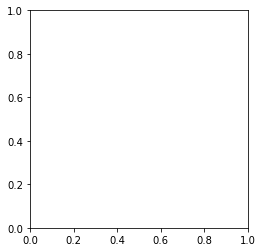

In [30]:
image = X_train[1000].reshape(28,28)
plt.imshow("image",cmap=plt.cm.gray)
plt.show()

In [7]:
n_input = X_train.shape[1]

In [8]:
n_output = y_train.shape[1]

In [9]:
n_clu1 = 256

In [10]:
n_hidden = 128

In [12]:
x = tf.placeholder(tf.float32,shape=(None,n_input),name="x")
y = tf.placeholder(tf.float32,shape=(None,n_output),name="y")

In [14]:
w_1 = tf.Variable(tf.random.normal([n_input,n_clu1]),dtype = tf.float32,name="w_1")
b_1 = tf.Variable(tf.random.normal([n_clu1]),dtype = tf.float32,name="b_1")
z_1 = tf.matmul(x,w_1)+b_1
a_1 = tf.nn.relu(z_1)

In [15]:
w_2 = tf.Variable(tf.random.normal([n_clu1,n_output]),dtype = tf.float32,name="w_2")
b_2 = tf.Variable(tf.zeros([n_output]),dtype = tf.float32,name="b_2")
z_2 = tf.matmul(a_1,w_2)+b_2
y_hat = tf.nn.softmax(z_2)

In [29]:
num_epoch = 100
bacth_size = 100
num_batch = int(mnist.train.num_examples/bacth_size)
learning_rate = 0.01

In [17]:
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_hat+tf.pow(10.0,-9)),axis=1))

In [32]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [19]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_hat,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [33]:
cost_batch = []
val_acc = []
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epoch):
        for bacth in range(num_batch):
            # 取一个子集
            batch_x,batch_y = mnist.train.next_batch(bacth_size)
            tfs.run(optimizer,feed_dict={x:batch_x,y:batch_y})
            cost_val = tfs.run(cost,feed_dict={x:batch_x,y:batch_y})
            cost_batch.append(cost_val)
        test_val = tfs.run(acc,feed_dict={x:X_val,y:y_val})
        val_acc.append(test_val)
    test_acc = tfs.run(acc,feed_dict={x:X_test,y:y_test})

In [34]:
test_acc

0.9716

optimizer = , learning_rate = , n_1 = , batch_size = 

degra 0.01
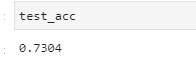


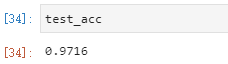

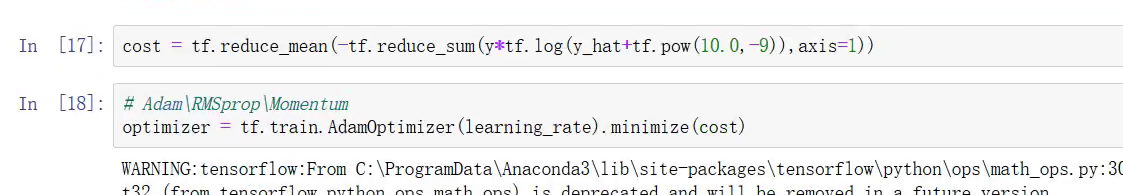

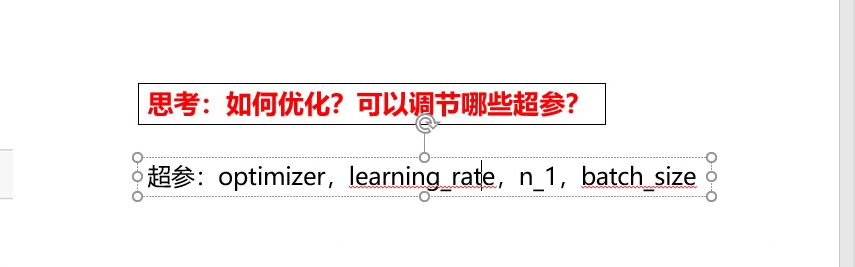